In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
y_pred = np.load('y_pred.npy')
f = np.load("../../mfcc_fixed.npz")
y_test = f['Y']

In [4]:
y_pred_argmax = tf.math.argmax(y_pred, axis=1).numpy()
y_true = y_test

target_names = ['AS', 'MR', 'MS', 'MVP', 'N']
print(classification_report(y_true, y_pred_argmax, target_names=target_names, digits=4))

              precision    recall  f1-score   support

          AS     1.0000    1.0000    1.0000       200
          MR     1.0000    0.9850    0.9924       200
          MS     0.9901    1.0000    0.9950       200
         MVP     0.9900    0.9950    0.9925       200
           N     1.0000    1.0000    1.0000       200

    accuracy                         0.9960      1000
   macro avg     0.9960    0.9960    0.9960      1000
weighted avg     0.9960    0.9960    0.9960      1000



In [15]:
watching_class = 4

y_pred_argmax = tf.math.argmax(y_pred, axis=1).numpy()
y_pred_tmp = np.zeros(y_pred_argmax.shape)
for i in range(len(y_pred_argmax)):
    if y_pred_argmax[i] == watching_class:
        y_pred_tmp[i] = 1
y_pred_argmax = y_pred_tmp

y_test_tmp = np.zeros(y_test.shape)
for i in range(len(y_test)):
    if y_test[i] == watching_class:
        y_test_tmp[i] = 1

y_true = y_test_tmp
target_names = ['Negative', 'Positive']
print(classification_report(y_true, y_pred_argmax, target_names=target_names, digits=10))

              precision    recall  f1-score   support

    Negative  1.0000000000 1.0000000000 1.0000000000       800
    Positive  1.0000000000 1.0000000000 1.0000000000       200

    accuracy                      1.0000000000      1000
   macro avg  1.0000000000 1.0000000000 1.0000000000      1000
weighted avg  1.0000000000 1.0000000000 1.0000000000      1000



In [16]:
"{0:.6}".format((1 + 1 + 0.9975000000 + 0.9975000000 + 1)/5)

'0.999'

## Confusion Matrix

In [11]:
y_pred_argmax = tf.math.argmax(y_pred, axis=1).numpy()
y_true = y_test
c_matrix = confusion_matrix(y_true, y_pred_argmax)

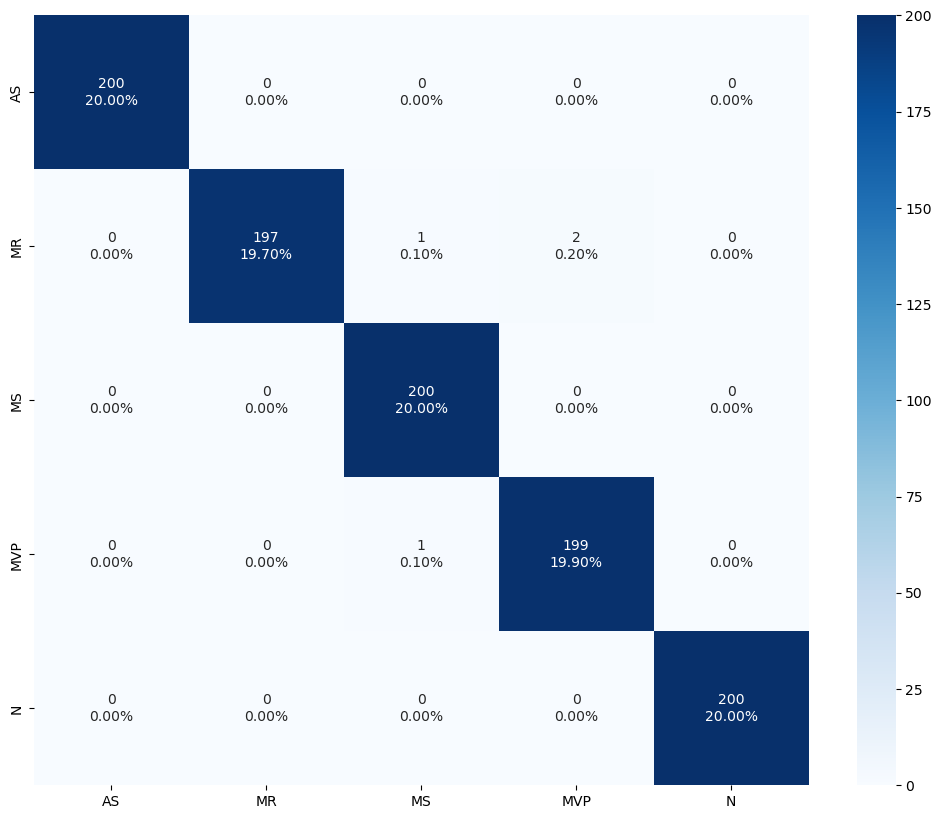

In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


group_counts = ["{0:0.0f}".format(value) for value in
                c_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(c_matrix.shape)


df_cm = pd.DataFrame(c_matrix, index = ['AS', 'MR', 'MS', 'MVP', 'N'],
                  columns = ['AS', 'MR', 'MS', 'MVP', 'N'])
plt.figure(figsize = (12.5,10))
cf_map = sn.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')

In [13]:
cf_map.get_figure().savefig("confusion_matrix.pdf")

## ROC Curve

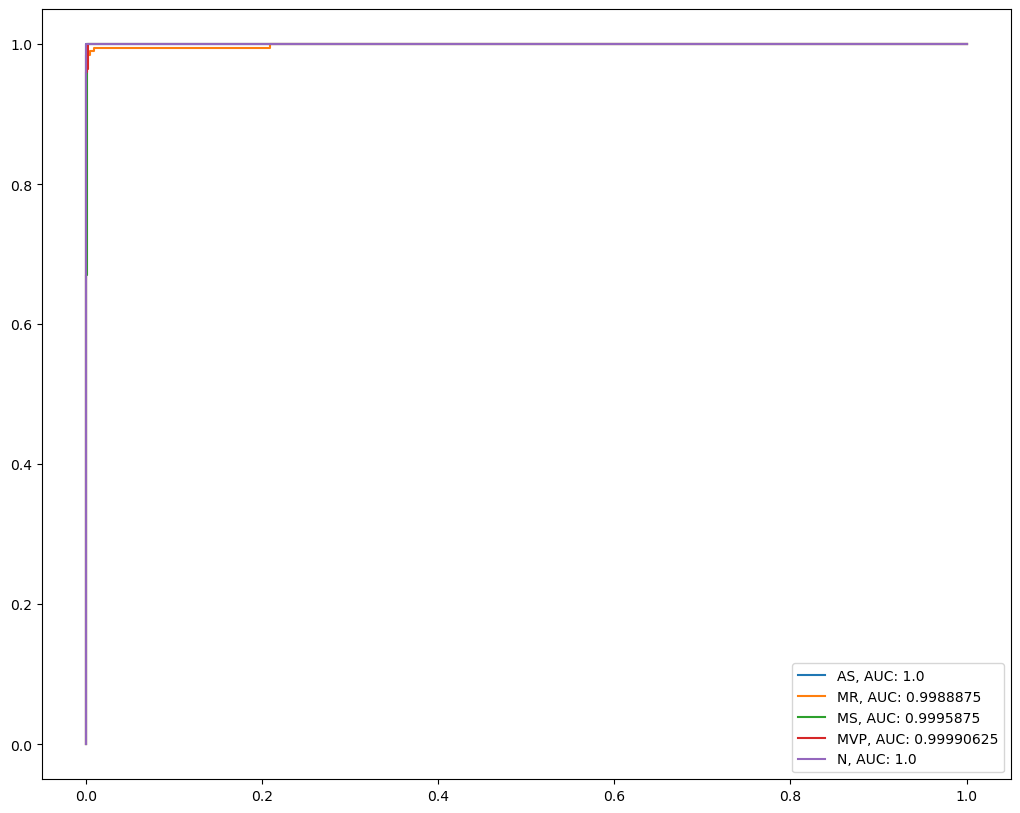

In [14]:
plt.figure(figsize=(12.5,10))
ax = plt.subplot()

auc = []
for i in range(5):
    y_true = tf.one_hot(y_test, 5)[:, i]
    y_score = y_pred[:, i]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc.append(roc_auc_score(y_true, y_score))
    ax.plot(fpr, tpr)
ax.legend(['AS, AUC: {0:.10}'.format(auc[0]), 'MR, AUC: {0:.10}'.format(auc[1]),
            'MS, AUC: {0:.10}'.format(auc[2]), 'MVP, AUC: {0:.10}'.format(auc[3]),
            'N, AUC: {0:.10}'.format(auc[4])])
plt.show()
ax.get_figure().savefig("ROC_curve_per_class.pdf")